In [13]:
# Imports of general use
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from music_loading import music_loading
from helper_data import helper_data
from plot_PeDF import plot_PeDF
from plot_ODF import plot_ODF

# Aqui você coloca o nome da música que vc quer dar uma olhada
filename = "120bpm_jazz.wav"
# Aqui você decide se quer uma wavelet de 5 níveis, de 1 só, ou de quantos for possível pro sinal!
nivel_wavelet = 5

# Código que carrega a música
musica_inteira = music_loading(filename, sample_rate=44100)

# Geração de ODFs e PeDFs
ODF_SET, PeDF_FULL_SET, PeDF_PARTIAL_SET = helper_data(musica_inteira, nivel_wavelet)

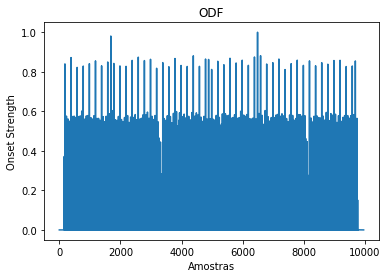

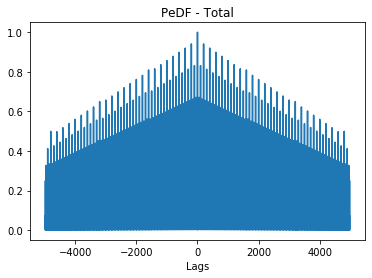

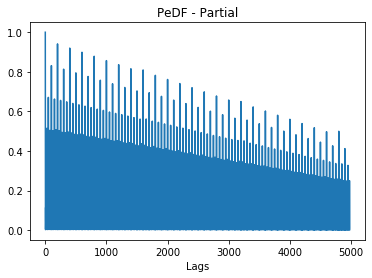

In [18]:
# Visualização

index = 1 # #cAN, cDN, cD(N-1), cD(N-2), .... based in level = N

plot_ODF(ODF_SET[index])
plot_PeDF(PeDF_FULL_SET[index], form="full")
plot_PeDF(PeDF_PARTIAL_SET[index], form="partial")